In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import MEArec as mr
import MEAutility as MEA
import yaml, os


In [22]:
# self defined mea
order = np.random.shuffle(np.arange(8*5))
our_mea = {
 'dim': [8, 5],
 'electrode_name': 'BlackRock-custom',
 'pitch': 10,
 'shape': 'square',
 'size': 10.0,
 'sortlist': None,
 'type': 'mea'}

with open('blackrock-custom.yaml', 'w') as f:
    yaml.dump(our_mea, f)


MEA.add_mea('blackrock-custom.yaml')


['BlackRock-custom', 'Neuronexus-32', 'Neuropixels-128', 'Neuropixels-24', 'Neuropixels-384', 'Neuropixels-64', 'Neuropixels2-128', 'Neuropixels2-24', 'Neuropixels2-384', 'Neuropixels2-64', 'Neuroseeker-128', 'SqMEA-10-15', 'SqMEA-15-10', 'SqMEA-5-30', 'SqMEA-6-25', 'SqMEA-7-20', 'monotrode', 'tetrode', 'tetrode-mea-d', 'tetrode-mea-l', 'tetrode-mea-s']


In [23]:
MEA.return_mea_info('tetrode')

{'electrode_name': 'tetrode',
 'description': 'Microwire tetrode with 4 circular contacts.',
 'sortlist': None,
 'pitch': 16,
 'dim': 2,
 'size': 8.0,
 'shape': 'circle',
 'type': 'wire',
 'plane': 'xy'}

In [24]:
mr.get_default_cell_models_folder()

'/home/annareisz/.config/mearec/1.9.1/cell_models/bbp'

In [64]:

cell_models_folder = "/home/annareisz/.config/mearec/1.9.1/cell_models/rgclike"
params = {
    # extracellular simulation settings
    "rot": "physrot", # random rotation to apply to cell models (norot, physrot, 3drot)
    "probe": 'SqMEA-6-25', # extracellular probe (if None probes are listed)
    "ncontacts": 1, # number of contacts per recording site
    #"overhang": 30 # extension in un beyond MEA boundaries for neuron locations (if lim is null)
    #"offset": 0 # plane offset (um) for MEA
    #"xlim": [10,80] # limits ( low high ) for neuron locations in the x-axis (depth)
    #"ylim": null # limits ( low high ) for neuron locations in the y-axis
    #"zlim": null # limits ( low high ) for neuron locations in the z-axis
    "det_thresh": 30, # detection threshold for EAPs
    "n": 3, # number of EAPs per cell model
    "seed": 42, # random seed for positions and rotations
    "sim_time": 1,
    #"target_spikes": [3, 50],  # min-max number of spikes in sim_time
    #"cut_out": [2, 5],  # pre-post peak cut_out in ms
    #"dt": 0.03125,  # time step (2**-5) in ms
    #"delay": 10,  # stimulation delay in ms
    #"weights": [0.25, 1.75]  # weights to multiply stimulus amplitude if number of spikes is above (0.25) or above (1.25) target spikes
}
tempgen = mr.gen_templates(cell_models_folder, params=params, templates_tmp_folder=None, intraonly=False, parallel=True,
                           recompile=False, n_jobs=None, delete_tmp=True, verbose=False)

Setting n_jobs to 8 CPUs
Starting simulation 1/1 - cell: L23_PC_cADpyr229_5

Intracellular simulation: /home/annareisz/.config/mearec/1.9.1/cell_models/rgclike/L23_PC_cADpyr229_5
Extracellular simulation: /home/annareisz/.config/mearec/1.9.1/cell_models/rgclike/L23_PC_cADpyr229_5
Setting temperature to 34.000000 C
Setting simulation time step to 0.025000 ms
	1 
	1 
	1 
template cADpyr229_L23_PC_c2e79db05a exist already
Pre-generating 300000 random positions
Aggregating templates



Simulation time: 3.6315808296203613





**Template generator object:**

templates: numpy array with (n_templates, n_electrodes, n_points) - not drifting - or (n_templates, n_drift_steps, n_electrodes, n_points) for drifting ones

locations: (n_templates) 3D locations for the templates (for not drifting) or (n_templates, n_drift_steps) 3D locations for drifting templates.

rotations: (n_templates) 3D rotations applied to the cell model before computing the template (for drifting templates rotation is fixed)

celltypes: (n_templates) cell types of the generated templates

info: dictionary with parameters used

In [65]:
tempgen.templates.shape # n templates, n channels, n timepoints

(3, 36, 224)

In [66]:
0.000025 # seconds between points
# num points in second
1/0.0000025
fs = 400000


In [67]:
# 224 points for 40 KHz, how many points for 30 KHz
224 * 30/40


168.0

In [68]:
mea = MEA.return_mea('BlackRock-custom')
mea.number_electrodes
mea.reset_currents(100)
mea.currents

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100.])

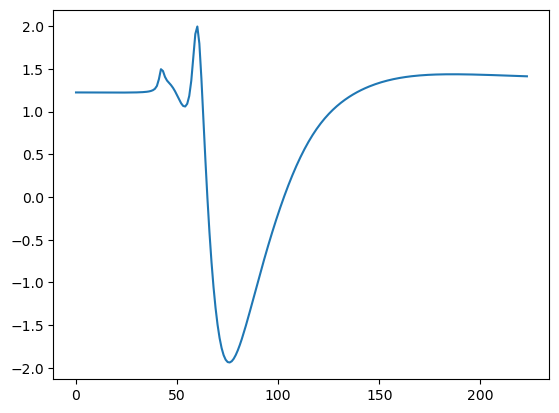

In [69]:
plt.plot(tempgen.templates[1][0])

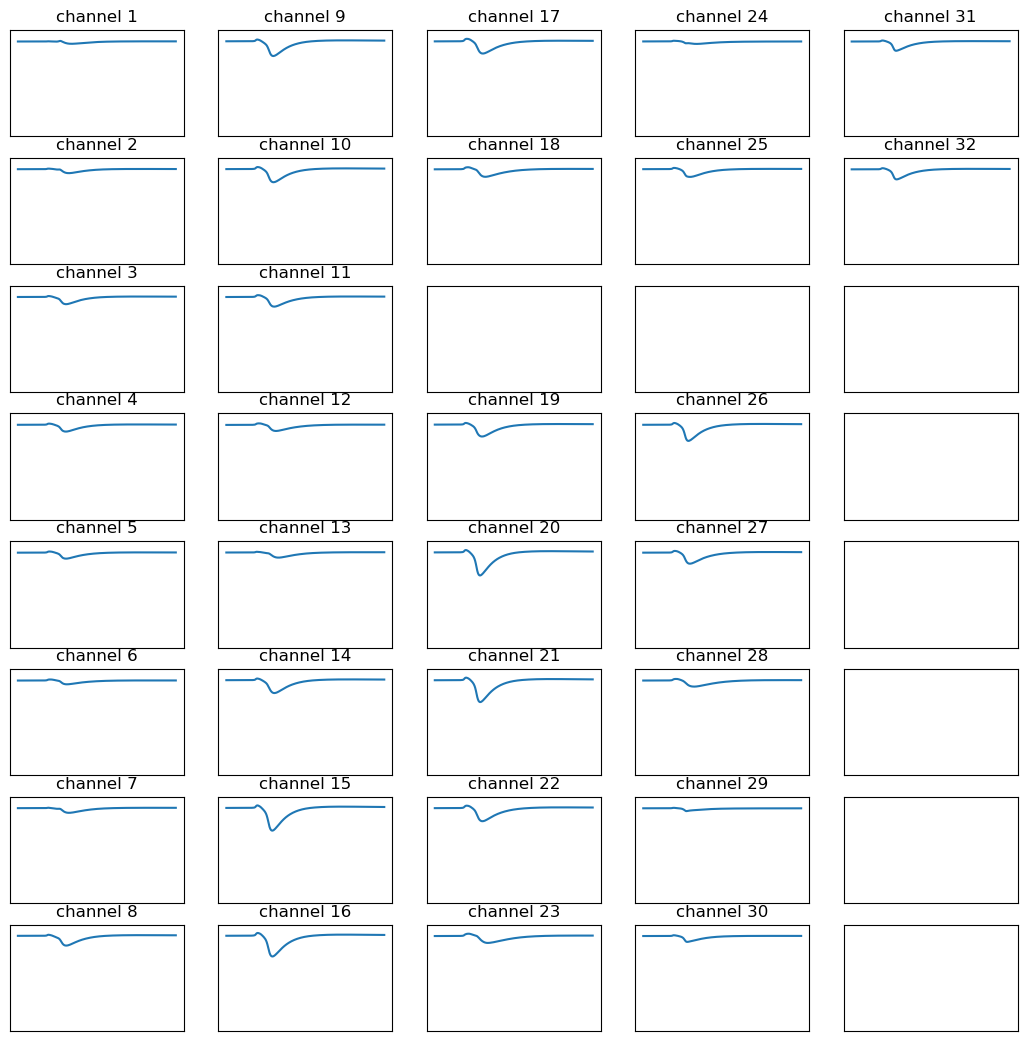

In [70]:
tempid = 1
channel_id = 8
fig, axs = plt.subplots(8, 5)
fig.set_figheight(13)
fig.set_figwidth(13)
for channel_id in range(8*5):
    i = channel_id % 8
    j = channel_id // 8
    ax = axs[i][j]
    
    ax.set_ylim(tempgen.templates.min(), tempgen.templates.max())
    title = f'channel {channel_id+1}'
    if channel_id == 18 or channel_id == 26:
        title = ''
    elif channel_id > 33:
        title = f''
    elif channel_id > 25:
        title = f'channel {channel_id +1 - 2}'
    elif channel_id > 18:
        title = f'channel {channel_id +1 - 1}'



    if i == 2 and j > 1:
        ax.plot([])
    elif channel_id > 33:
        ax.plot([])
    else:
        ax.plot(tempgen.templates[tempid][channel_id])
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

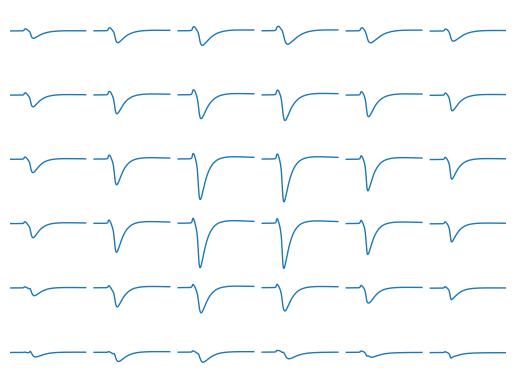

In [71]:
mr.plot_templates(tempgen, template_ids=tempid, drifting=False)
plt.show()